In [276]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import os
from shapely.geometry import Point
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

### New coding for questions:
SAS1: Have you been stopped? \
SAS11: Were they polite? \
SAS12: Were they respectful? \
SAS13: Did they explain why? \
SAS14: What was your opinion before being SaS \
SAS15: How did opinion change \
SAS2: Do you know someone that has been SaS'd \
SAS21: What is their opinion? \
SAS3: Should police do SAS? \
SAS31: Do you think they do SaS fairly in your area?


In [277]:
df_reg = pd.read_csv(r"C:\Users\Usuario\Desktop\TUE\Data Challenge 2\data\PAS SaS with Proportions.csv")

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21136\3583593428.py:1: DtypeWarning: Columns (8,9,12,13,14,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reg = pd.read_csv(r"C:\Users\Usuario\Desktop\TUE\Data Challenge 2\data\PAS SaS with Proportions.csv")


In [278]:
df_reg = df_reg.drop(columns= ["Unnamed: 0.1","Unnamed: 0"])

In [279]:
df_columns = ['Age', 'Employment', 'Ethnicity', 'FinancialYear', 'Borough', 'SAS1',
       'SAS11', 'SAS12', 'SAS13', 'SAS14', 'SAS15', 'SAS2', 'SAS21', 'SAS3', 'SAS31',
        'MPS Trust', 'Good Job','Well informed',
       '"Good Job" local_proportion', 'Contact ward officer_proportion',
       'Informed local_proportion', 'Listen to concerns_proportion',
       'Relied on to be there_proportion', 'Treat everyone fairly_proportion',
       'Trust MPS_proportion', 'Understand issues_proportion']

In [280]:
for i in df_columns:
    print(df_reg[f'{i}'].value_counts())

Age
65+      15971
35-44    15836
25-34    14976
45-54    11261
55-64     8967
16-24     7397
Name: count, dtype: int64
Employment
Full-time       32739
Retired         16306
Part-time        9977
Unemployed       6209
House person     4508
Student          4475
Name: count, dtype: int64
Ethnicity
White    47990
Asian    12106
Black     9093
Other     4666
Name: count, dtype: int64
FinancialYear
2016/17    12699
2015/16    12657
2018/19    12649
2017/18    12625
2019/20    12190
2020/21    11791
Name: count, dtype: int64
Borough
Richmond upon Thames      2351
Bexley                    2349
Havering                  2349
Harrow                    2348
Barking and Dagenham      2344
Redbridge                 2341
Barnet                    2341
Sutton                    2341
Wandsworth                2339
Islington                 2338
Hammersmith and Fulham    2337
Newham                    2336
Hillingdon                2334
Southwark                 2334
Ealing                    2333


In [281]:
df_reg.columns

Index(['Age', 'Employment', 'Ethnicity', 'FinancialYear', 'Borough', 'SAS1',
       'SAS14', 'SAS15', 'SAS3', 'SAS31', 'MPS Trust', 'Good Job',
       'Well informed', 'SAS11', 'SAS12', 'SAS13', 'SAS2', 'SAS21',
       '"Good Job" local_proportion', 'Contact ward officer_proportion',
       'Informed local_proportion', 'Listen to concerns_proportion',
       'Relied on to be there_proportion', 'Treat everyone fairly_proportion',
       'Trust MPS_proportion', 'Understand issues_proportion'],
      dtype='object')

# 1-Classification prediction based of SAS31 **4 ANSWERS** with SAS1-15 and SAS2-21

In [282]:
df_random_forest1 = df_reg[['SAS1','SAS11', 'SAS12', 'SAS13','SAS2','SAS21','SAS31']].dropna()
df_random_forest1

,SAS1,SAS11,SAS12,SAS13,SAS2,SAS21,SAS31
65802,Yes,No,Yes,Yes,Yes,Mixed,Fairly confident
65803,Yes,No,No,Yes,Yes,Mixed,Not very confident
65833,Yes,No,No,Yes,Yes,Negative,Not at all confident
65839,Yes,Yes,Yes,Yes,Yes,Mixed,Fairly confident
65862,Yes,Yes,Yes,No,Yes,Negative,Not very confident
...,...,...,...,...,...,...,...
74524,Yes,Yes,Yes,Yes,Yes,Mixed,Not very confident
74525,Yes,Yes,Yes,Yes,Yes,Mixed,Fairly confident
74526,Yes,No,No,Yes,Yes,Negative,Not at all confident
74571,Yes,Yes,Yes,Yes,Yes,Positive,Not very confident


In [283]:
predictors_SAS31 = ['SAS1', 'SAS11', 'SAS12', 'SAS13', 'SAS2', 'SAS21']
target_SAS31 = 'SAS31'

In [284]:
df_encoded = pd.get_dummies(df_random_forest1[predictors_SAS31], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_encoded, df_random_forest1[target_SAS31], test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model_SAS31 = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model_SAS31.fit(X_train, y_train)

# Make predictions
y_pred = rf_model_SAS31.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[33  1  1 11]
 [ 7 16  3  0]
 [22 14  6  1]
 [14  2  2 14]]

Classification Report:
                      precision    recall  f1-score   support

    Fairly confident       0.43      0.72      0.54        46
Not at all confident       0.48      0.62      0.54        26
  Not very confident       0.50      0.14      0.22        43
      Very confident       0.54      0.44      0.48        32

            accuracy                           0.47       147
           macro avg       0.49      0.48      0.45       147
        weighted avg       0.49      0.47      0.43       147


Accuracy Score:
0.46938775510204084



Feature Importances:
          Feature  Importance
3  SAS21_Negative    0.256652
4  SAS21_Positive    0.217850
0       SAS11_Yes    0.202858
1       SAS12_Yes    0.202140
2       SAS13_Yes    0.120500


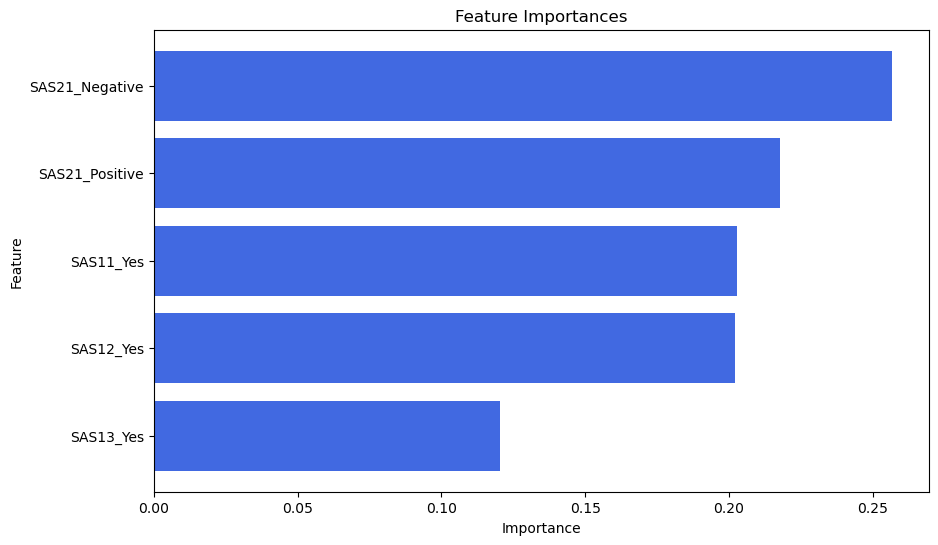

In [285]:
feature_importances = rf_model_SAS31.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': df_encoded.columns,  # Use the columns from df_encoded which includes the one-hot encoded features
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("\nFeature Importances:")
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='royalblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

# 2-Classification prediction based of SAS31 **BINARY ANSWER** with SAS1-15 and SAS2-21

In [286]:
confidence_mapping = {
    'Fairly confident': 'Confident',
    'Very confident': 'Confident',
    'Not very confident': 'Not Confident',
    'Not at all confident': 'Not Confident'
}

# Create the new column 'SAS31 Binary'
df_random_forest1['SAS31 Binary'] = df_random_forest1['SAS31'].map(confidence_mapping)


In [287]:
predictors_binary_SAS31 = ['SAS1', 'SAS11', 'SAS12', 'SAS13', 'SAS2', 'SAS21']
target_binary_SAS31 = 'SAS31 Binary'

In [288]:
df_encoded = pd.get_dummies(df_random_forest1[predictors_binary_SAS31], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_encoded, df_random_forest1[target_binary_SAS31], test_size=0.35, random_state=42)

# Initialize the Random Forest model
rf_model_SAS31_binary = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model_SAS31_binary.fit(X_train, y_train)

# Make predictions
y_pred = rf_model_SAS31_binary.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[106  31]
 [ 33  86]]

Classification Report:
               precision    recall  f1-score   support

    Confident       0.76      0.77      0.77       137
Not Confident       0.74      0.72      0.73       119

     accuracy                           0.75       256
    macro avg       0.75      0.75      0.75       256
 weighted avg       0.75      0.75      0.75       256


Accuracy Score:
0.75



Feature Importances:
          Feature  Importance
3  SAS21_Negative    0.364197
1       SAS12_Yes    0.283314
0       SAS11_Yes    0.164724
4  SAS21_Positive    0.109547
2       SAS13_Yes    0.078218


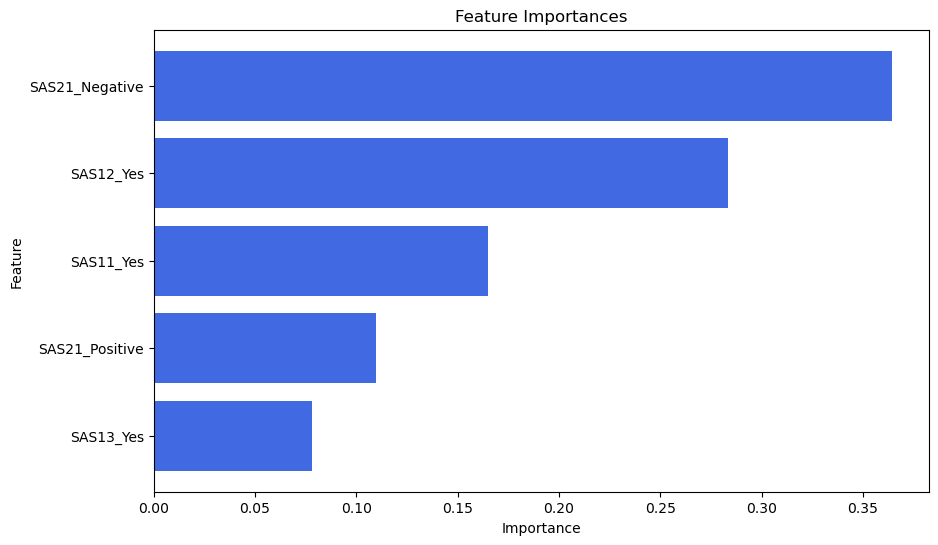

In [289]:
feature_importances = rf_model_SAS31_binary.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': df_encoded.columns,  # Use the columns from df_encoded which includes the one-hot encoded features
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("\nFeature Importances:")
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='royalblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

# 3-Logistic Regression based of SAS31 **BINARY ANSWER** with SAS1-15 and SAS2-21

Confusion Matrix:
[[105  32]
 [ 27  92]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       137
           1       0.74      0.77      0.76       119

    accuracy                           0.77       256
   macro avg       0.77      0.77      0.77       256
weighted avg       0.77      0.77      0.77       256


Accuracy Score:
0.76953125

Feature Importances:
  Feature  Importance
4   SAS21    1.241310
2   SAS12    1.030812
3   SAS13    0.468185
1   SAS11    0.260398
0    SAS1    0.000075


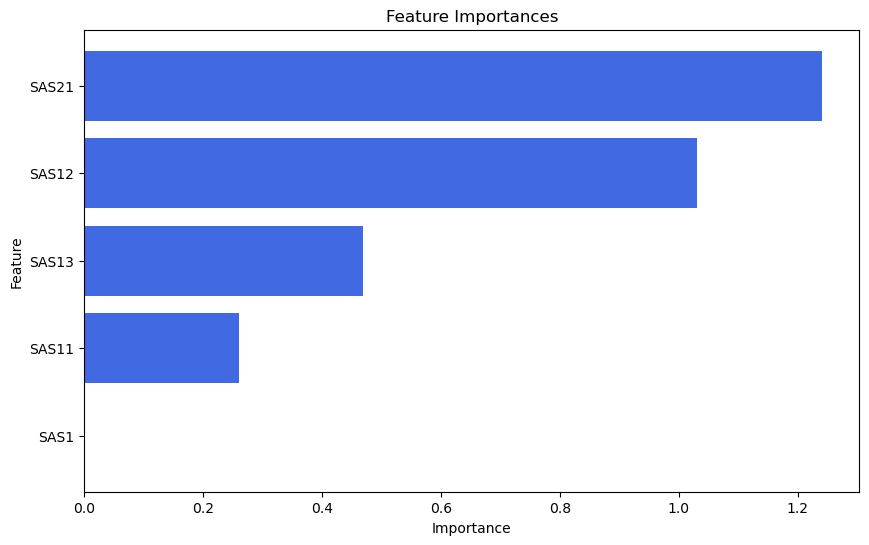

In [290]:
# Mapping dictionary for SAS31 Binary
confidence_mapping = {
    'Fairly confident': 'Confident',
    'Very confident': 'Confident',
    'Not very confident': 'Not Confident',
    'Not at all confident': 'Not Confident'
}

# Create the new column 'SAS31 Binary'
df_random_forest1['SAS31 Logistic'] = df_random_forest1['SAS31'].map(confidence_mapping)

# Specify the predictor variables and the new binary target variable
predictors = ['SAS1', 'SAS11', 'SAS12', 'SAS13', 'SAS2', 'SAS21']
target = 'SAS31 Binary'

# Encode ordinal variables
ordinal_mappings = {
    'SAS1': {'No': 0, 'Yes': 1},
    'SAS11': {'No': 0, 'Yes': 1},
    'SAS12': {'No': 0, 'Yes': 1},
    'SAS13': {'No': 0, 'Yes': 1},
    'SAS21': {'Negative': -1, 'Mixed': 0, 'Positive': 1}
}

# Apply ordinal encoding
for col, mapping in ordinal_mappings.items():
    df_random_forest1[col] = df_random_forest1[col].map(mapping)

# One-Hot Encode nominal variables if needed
df_encoded = pd.get_dummies(df_random_forest1[predictors], drop_first=True)

# Encode the target variable
le_target = LabelEncoder()
df_random_forest1[target] = le_target.fit_transform(df_random_forest1[target])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_encoded, df_random_forest1[target], test_size=0.35, random_state=42)

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000)

# Train the model
log_reg_model.fit(X_train, y_train)

# Make predictions
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Get feature importances (coefficients) for logistic regression
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': np.abs(log_reg_model.coef_[0])  # Taking absolute value of coefficients
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("\nFeature Importances:")
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='royalblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()


# 4-Classification prediction based of SAS3 **4 ANSWERS** with SAS1-15 and SAS2-21

In [291]:
df_random_forest2 = df_reg[['SAS1','SAS11', 'SAS12', 'SAS13','SAS2','SAS21','SAS3']].dropna()
df_random_forest2 = df_random_forest2[df_random_forest2["SAS3"] != "Neither agree nor disagree"]
df_random_forest2

,SAS1,SAS11,SAS12,SAS13,SAS2,SAS21,SAS3
65795,Yes,Yes,Yes,No,Yes,Mixed,Strongly agree
65802,Yes,No,Yes,Yes,Yes,Mixed,Strongly agree
65803,Yes,No,No,Yes,Yes,Mixed,Tend to agree
65833,Yes,No,No,Yes,Yes,Negative,Strongly agree
65839,Yes,Yes,Yes,Yes,Yes,Mixed,Strongly agree
...,...,...,...,...,...,...,...
74521,Yes,No,No,Yes,Yes,Mixed,Tend to agree
74525,Yes,Yes,Yes,Yes,Yes,Mixed,Strongly agree
74526,Yes,No,No,Yes,Yes,Negative,Strongly agree
74571,Yes,Yes,Yes,Yes,Yes,Positive,Strongly agree


In [292]:
predictors_SAS3 = ['SAS1', 'SAS11', 'SAS12', 'SAS13', 'SAS2', 'SAS21']
target_SAS3 = 'SAS3'

In [293]:
df_encoded = pd.get_dummies(df_random_forest2[predictors_SAS3], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_encoded, df_random_forest2[target_SAS3], test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model_SAS3 = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model_SAS3.fit(X_train, y_train)

# Make predictions
y_pred = rf_model_SAS3.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[33  4 12  1]
 [ 3  6  9  0]
 [11  0 10  1]
 [ 1  3  3  0]]

Classification Report:
                   precision    recall  f1-score   support

   Strongly agree       0.69      0.66      0.67        50
Strongly disagree       0.46      0.33      0.39        18
    Tend to agree       0.29      0.45      0.36        22
 Tend to disagree       0.00      0.00      0.00         7

         accuracy                           0.51        97
        macro avg       0.36      0.36      0.35        97
     weighted avg       0.51      0.51      0.50        97


Accuracy Score:
0.5051546391752577


# 5-Classification prediction based of SAS31 **BINARY** with SAS1-15 and SAS2-21

In [294]:
agree_mapping = {
    'Strongly agree': 'Agree',
    'Tend to agree': 'Agree',
    'Strongly disagree': 'Disagree',
    'Tend to disagree': 'Disagree'
}

# Create the new column 'SAS31 Binary'
df_random_forest2['SAS3 Binary'] = df_random_forest2['SAS3'].map(agree_mapping)


In [295]:
predictors_binary_SAS3 = ['SAS1', 'SAS11', 'SAS12', 'SAS13', 'SAS2', 'SAS21']
target_binary_SAS3 = 'SAS3 Binary'

Confusion Matrix:
[[80  9]
 [17 15]]

Classification Report:
              precision    recall  f1-score   support

       Agree       0.82      0.90      0.86        89
    Disagree       0.62      0.47      0.54        32

    accuracy                           0.79       121
   macro avg       0.72      0.68      0.70       121
weighted avg       0.77      0.79      0.77       121


Accuracy Score:
0.7851239669421488

Feature Importances:
          Feature  Importance
3  SAS21_Negative    0.271166
2       SAS13_Yes    0.255627
0       SAS11_Yes    0.204274
1       SAS12_Yes    0.193886
4  SAS21_Positive    0.075047


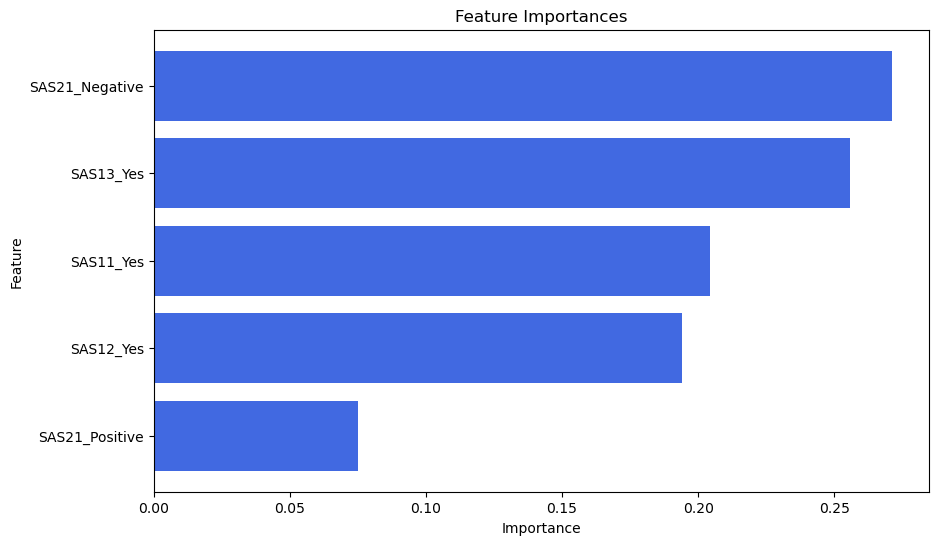

In [296]:
df_encoded = pd.get_dummies(df_random_forest2[predictors_binary_SAS3], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_encoded, df_random_forest2[target_binary_SAS3], test_size=0.25, random_state=42)

# Initialize the Random Forest model
rf_model_SAS3_binary = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model_SAS3_binary.fit(X_train, y_train)

# Make predictions
y_pred = rf_model_SAS3_binary.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

feature_importances = rf_model_SAS3_binary.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': df_encoded.columns,  # Use the columns from df_encoded which includes the one-hot encoded features
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("\nFeature Importances:")
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='royalblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

# 6-Logistic Regression based of SAS31 **BINARY** with SAS1-15 and SAS2-21

Confusion Matrix:
[[89  0]
 [32  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        89
           1       0.00      0.00      0.00        32

    accuracy                           0.74       121
   macro avg       0.37      0.50      0.42       121
weighted avg       0.54      0.74      0.62       121


Accuracy Score:
0.7355371900826446

Feature Importances:
  Feature  Importance
4   SAS21    0.694622
3   SAS13    0.639652
1   SAS11    0.351761
2   SAS12    0.269688
0    SAS1    0.000054


C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


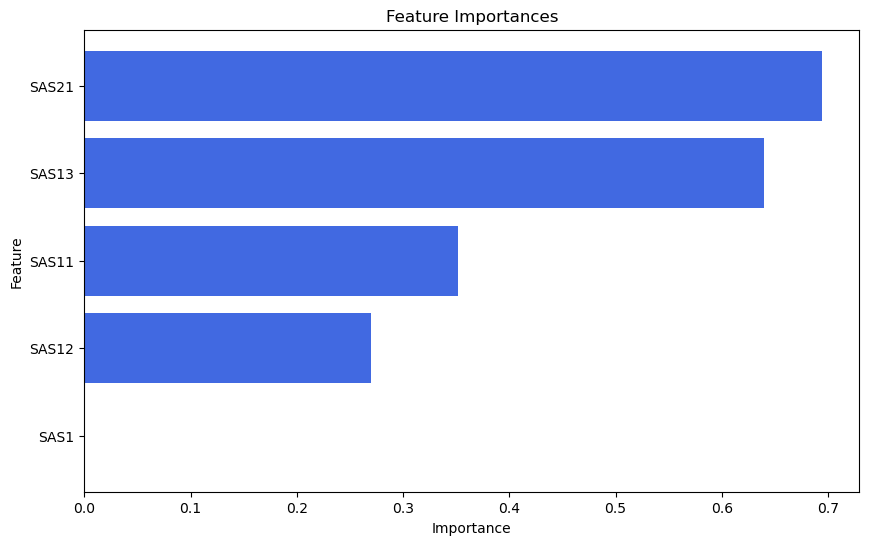

In [163]:
# Specify the predictor variables and the new binary target variable
predictors = ['SAS1', 'SAS11', 'SAS12', 'SAS13', 'SAS2', 'SAS21']
target = 'SAS3 Binary'

# Encode ordinal variables
ordinal_mappings = {
    'SAS1': {'No': 0, 'Yes': 1},
    'SAS11': {'No': 0, 'Yes': 1},
    'SAS12': {'No': 0, 'Yes': 1},
    'SAS13': {'No': 0, 'Yes': 1},
    'SAS21': {'Negative': -1, 'Mixed': 0, 'Positive': 1}
}

# Apply ordinal encoding
for col, mapping in ordinal_mappings.items():
    df_random_forest2[col] = df_random_forest2[col].map(mapping)

# One-Hot Encode nominal variables if needed
df_encoded = pd.get_dummies(df_random_forest2[predictors], drop_first=True)

# Encode the target variable
le_target = LabelEncoder()
df_random_forest2[target] = le_target.fit_transform(df_random_forest2[target])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_encoded, df_random_forest2[target], test_size=0.25, random_state=42)

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000)

# Train the model
log_reg_model.fit(X_train, y_train)

# Make predictions
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Get feature importances (coefficients) for logistic regression
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': np.abs(log_reg_model.coef_[0])  # Taking absolute value of coefficients
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("\nFeature Importances:")
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='royalblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()


# 7- Classification prediction of SAS1-15 SAS2-21 for Trust, Confidence and Well Informed

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21136\4035251602.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model_trust.fit(X_train, y_train)


Confusion Matrix:
[[5614    0]
 [ 296    0]]

Classification Report:


C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       Agree       0.95      1.00      0.97      5614
    Disagree       0.00      0.00      0.00       296

    accuracy                           0.95      5910
   macro avg       0.47      0.50      0.49      5910
weighted avg       0.90      0.95      0.93      5910


Accuracy Score:
0.9499153976311336

Feature Importances:
                      Feature  Importance
4  SAS31_Not at all confident    0.567353
1      SAS3_Strongly disagree    0.151940
5    SAS31_Not very confident    0.149136
3       SAS3_Tend to disagree    0.063787
2          SAS3_Tend to agree    0.038598
6        SAS31_Very confident    0.015436
0         SAS3_Strongly agree    0.013750


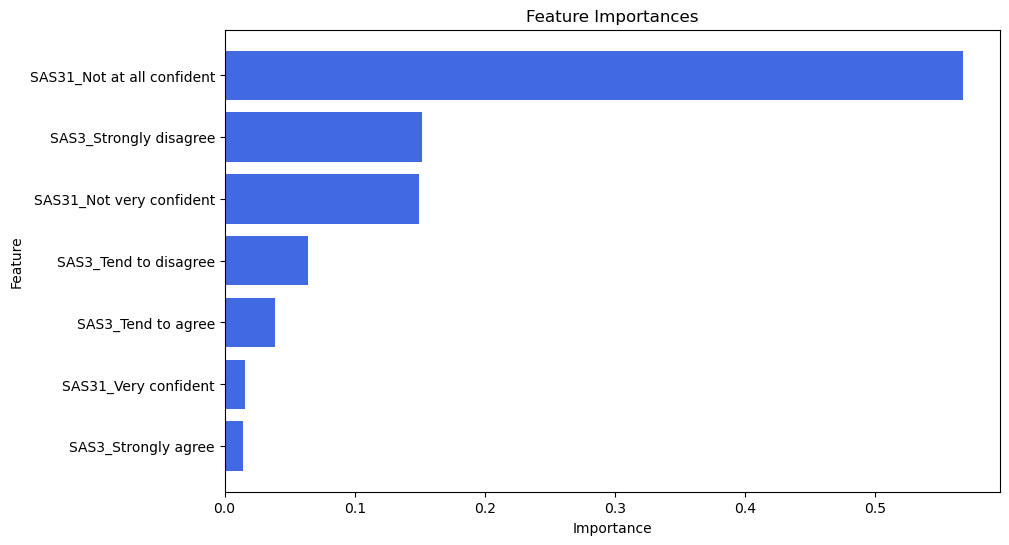

In [248]:
df_random_forest_trust = df_reg[['SAS3','SAS31','MPS Trust']].dropna()
df_random_forest_trust = df_random_forest_trust[df_random_forest_trust["MPS Trust"] != "Neither agree nor disagree"]
trust_mapping = {
    'Tend to agree': 'Agree',
    'Strongly agree': 'Agree',
    'Tend to disagree': 'Disagree',
    'Strongly disagree': 'Disagree'
}

# Create the new column 'SAS31 Binary'
df_random_forest_trust['MPS Trust Binary'] = df_random_forest_trust['MPS Trust'].map(trust_mapping)

predictors_trust = ['SAS3', 'SAS31']
target_trust = ["MPS Trust Binary"]

df_encoded = pd.get_dummies(df_random_forest_trust[predictors_trust], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_encoded, df_random_forest_trust[target_trust], test_size=0.3, random_state=42)

# Initialize the Random Forest model
rf_model_trust = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model_trust.fit(X_train, y_train)

# Make predictions
y_pred = rf_model_trust.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


feature_importances = rf_model_trust.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': df_encoded.columns,  # Use the columns from df_encoded which includes the one-hot encoded features
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("\nFeature Importances:")
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='royalblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21136\3294927431.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model_confidence.fit(X_train, y_train)


Confusion Matrix:
[[5755  158]
 [2237  232]]

Classification Report:
              precision    recall  f1-score   support

        Good       0.72      0.97      0.83      5913
        Poor       0.59      0.09      0.16      2469

    accuracy                           0.71      8382
   macro avg       0.66      0.53      0.50      8382
weighted avg       0.68      0.71      0.63      8382


Accuracy Score:
0.7142686709615843

Feature Importances:
                      Feature  Importance
4  SAS31_Not at all confident    0.348472
5    SAS31_Not very confident    0.303879
6        SAS31_Very confident    0.196573
2          SAS3_Tend to agree    0.071959
3       SAS3_Tend to disagree    0.027852
1      SAS3_Strongly disagree    0.026766
0         SAS3_Strongly agree    0.024500


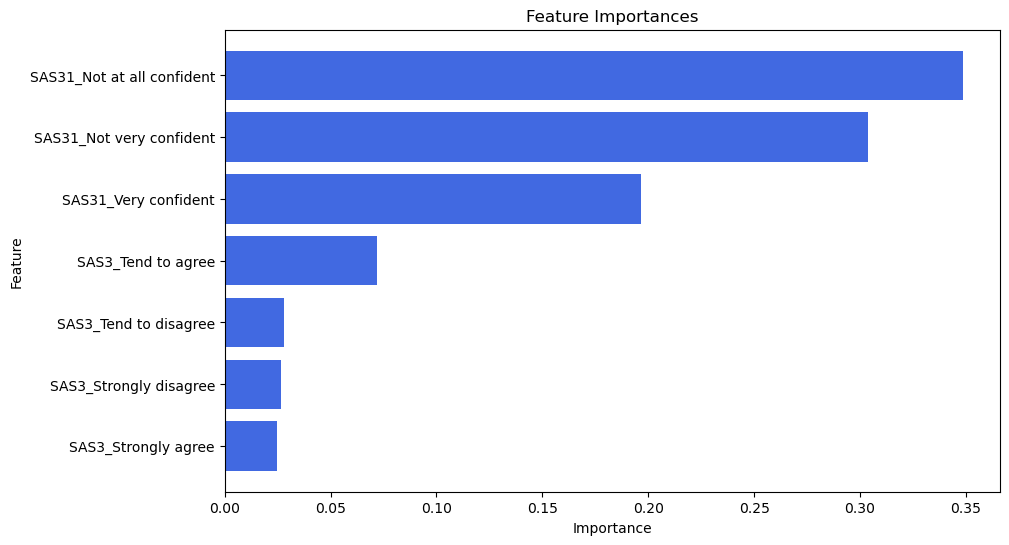

In [298]:
df_random_forest_confidence = df_reg[['SAS3','SAS31','Good Job']].dropna()
confidence_mapping = {
    'Excellent': 'Good',
    'Good': 'Good',
    'Fair': 'Poor',
    'Poor': 'Poor',
    'Very poor': 'Poor'
}

# Create the new column 'SAS31 Binary'
df_random_forest_confidence['Good Job Binary'] = df_random_forest_confidence['Good Job'].map(confidence_mapping)

predictors_confidence = ['SAS3', 'SAS31']
target_confidence = ["Good Job Binary"]

df_encoded = pd.get_dummies(df_random_forest_confidence[predictors_confidence], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_encoded, df_random_forest_confidence[target_confidence], test_size=0.4, random_state=42)

# Initialize the Random Forest model
rf_model_confidence = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model_confidence.fit(X_train, y_train)

# Make predictions
y_pred = rf_model_confidence.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

feature_importances = rf_model_confidence.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': df_encoded.columns,  # Use the columns from df_encoded which includes the one-hot encoded features
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("\nFeature Importances:")
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='royalblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21136\66334712.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model_informed.fit(X_train, y_train)


Confusion Matrix:
[[ 707 2246]
 [ 567 2820]]

Classification Report:
              precision    recall  f1-score   support

    Informed       0.55      0.24      0.33      2953
Not informed       0.56      0.83      0.67      3387

    accuracy                           0.56      6340
   macro avg       0.56      0.54      0.50      6340
weighted avg       0.56      0.56      0.51      6340


Accuracy Score:
0.5563091482649842

Feature Importances:
                      Feature  Importance
5    SAS31_Not very confident    0.342775
6        SAS31_Very confident    0.277958
4  SAS31_Not at all confident    0.188639
3       SAS3_Tend to disagree    0.068345
0         SAS3_Strongly agree    0.058416
2          SAS3_Tend to agree    0.037540
1      SAS3_Strongly disagree    0.026326


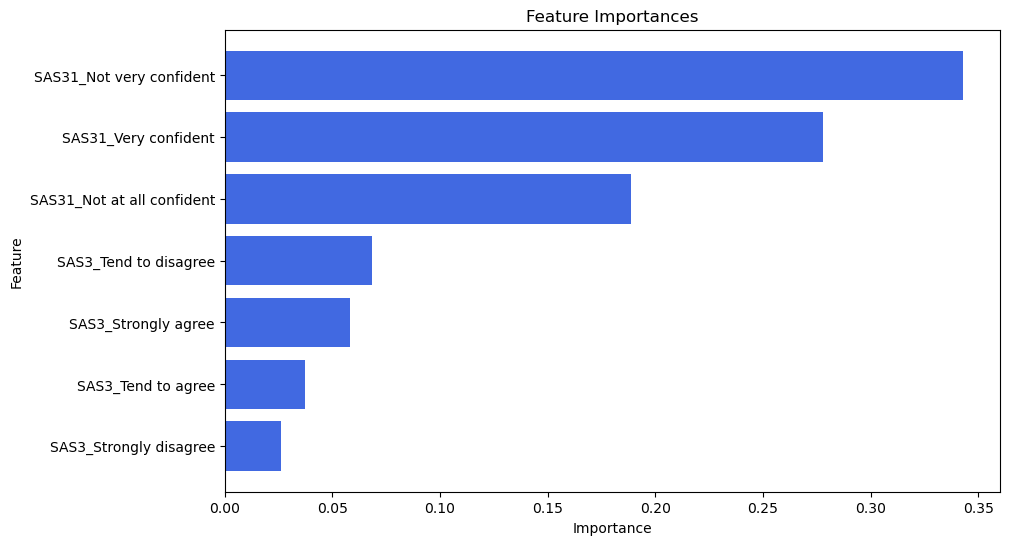

In [299]:
df_random_forest_informed = df_reg[['SAS3','SAS31','Well informed']].dropna()
informed_mapping = {
    'Very well informed': 'Informed',
    'Fairly well informed': 'Informed',
    'Not at all informed': 'Not informed',
}

# Create the new column 'SAS31 Binary'
df_random_forest_informed['Well informed Binary'] = df_random_forest_informed['Well informed'].map(informed_mapping)

predictors_informed = ['SAS3', 'SAS31']
target_informed = ["Well informed Binary"]

df_encoded = pd.get_dummies(df_random_forest_informed[predictors_informed], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_encoded, df_random_forest_informed[target_informed], test_size=0.3, random_state=42)

# Initialize the Random Forest model
rf_model_informed = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model_informed.fit(X_train, y_train)

# Make predictions
y_pred = rf_model_informed.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

feature_importances = rf_model_informed.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': df_encoded.columns,  # Use the columns from df_encoded which includes the one-hot encoded features
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("\nFeature Importances:")
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='royalblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

# 8-Logistic Regression of Trust, Confidence and Informed with Mapped SAS3 and SAS31

In [251]:
df_reg["SAS3"].value_counts(), df_reg["SAS31"].value_counts()

(SAS3
 Tend to agree                 29607
 Strongly agree                26404
 Neither agree nor disagree     7900
 Tend to disagree               4642
 Strongly disagree              2567
 Name: count, dtype: int64,
 SAS31
 Fairly confident        35590
 Very confident          12779
 Not very confident      12006
 Not at all confident     3687
 Name: count, dtype: int64)

Confusion Matrix:
[[   0  296]
 [   0 5614]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       296
           1       0.95      1.00      0.97      5614

    accuracy                           0.95      5910
   macro avg       0.47      0.50      0.49      5910
weighted avg       0.90      0.95      0.93      5910


Accuracy Score:
0.9499153976311336

Logistic Regression Coefficients:
         Feature  Coefficient
0   SAS3_numeric     0.288378
1  SAS31_numeric     1.519770

Intercept: -1.7861148208552184


C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


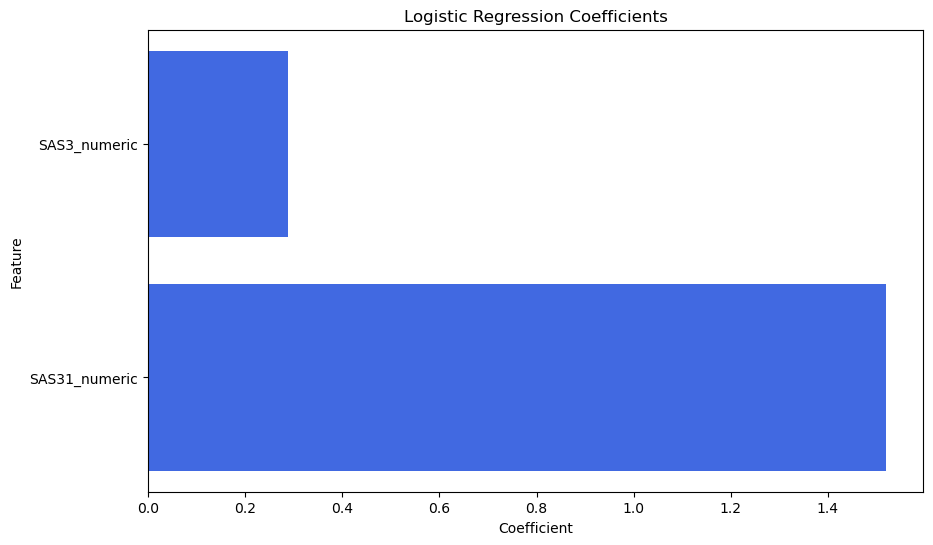

In [252]:
df_random_forest_trust = df_reg[['SAS3', 'SAS31', 'MPS Trust']].dropna()
df_random_forest_trust = df_random_forest_trust[df_random_forest_trust["MPS Trust"] != "Neither agree nor disagree"]

trust_mapping = {
    'Tend to agree': 'Agree',
    'Strongly agree': 'Agree',
    'Tend to disagree': 'Disagree',
    'Strongly disagree': 'Disagree'
}

# Create the new column 'MPS Trust Binary'
df_random_forest_trust['MPS Trust Binary'] = df_random_forest_trust['MPS Trust'].map(trust_mapping)

# Map ordinal categories to numeric values
sas3_mapping = {
    'Strongly disagree': 1,
    'Tend to disagree': 2,
    'Neither agree nor disagree': 3,
    'Tend to agree': 4,
    'Strongly agree': 5
}

sas31_mapping = {
    'Not at all confident': 1,
    'Not very confident': 2,
    'Fairly confident': 3,
    'Very confident': 4
}

df_random_forest_trust['SAS3_numeric'] = df_random_forest_trust['SAS3'].map(sas3_mapping)
df_random_forest_trust['SAS31_numeric'] = df_random_forest_trust['SAS31'].map(sas31_mapping)

# Define predictors and target
predictors_trust = ['SAS3_numeric', 'SAS31_numeric']
target_trust = 'MPS Trust Binary'

# Convert target to binary values
df_random_forest_trust['MPS Trust Binary'] = df_random_forest_trust['MPS Trust Binary'].map({'Agree': 1, 'Disagree': 0})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_random_forest_trust[predictors_trust], df_random_forest_trust[target_trust], test_size=0.3, random_state=42)

# Initialize the Logistic Regression model
logistic_model_trust = LogisticRegression()

# Train the model
logistic_model_trust.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model_trust.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Get the model coefficients
coefficients = logistic_model_trust.coef_[0]
intercept = logistic_model_trust.intercept_

# Create a DataFrame for better visualization
coefficients_df = pd.DataFrame({
    'Feature': predictors_trust,
    'Coefficient': coefficients
})

# Print coefficients
print("\nLogistic Regression Coefficients:")
print(coefficients_df)
print(f"\nIntercept: {intercept[0]}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'], color='royalblue')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.gca().invert_yaxis()
plt.show()


Confusion Matrix:
[[ 115 1114]
 [  68 2894]]

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.09      0.16      1229
           1       0.72      0.98      0.83      2962

    accuracy                           0.72      4191
   macro avg       0.68      0.54      0.50      4191
weighted avg       0.69      0.72      0.63      4191


Accuracy Score:
0.717967072297781

Logistic Regression Coefficients:
         Feature  Coefficient
0   SAS3_numeric    -0.019351
1  SAS31_numeric     0.661639

Intercept: -0.993719408504428


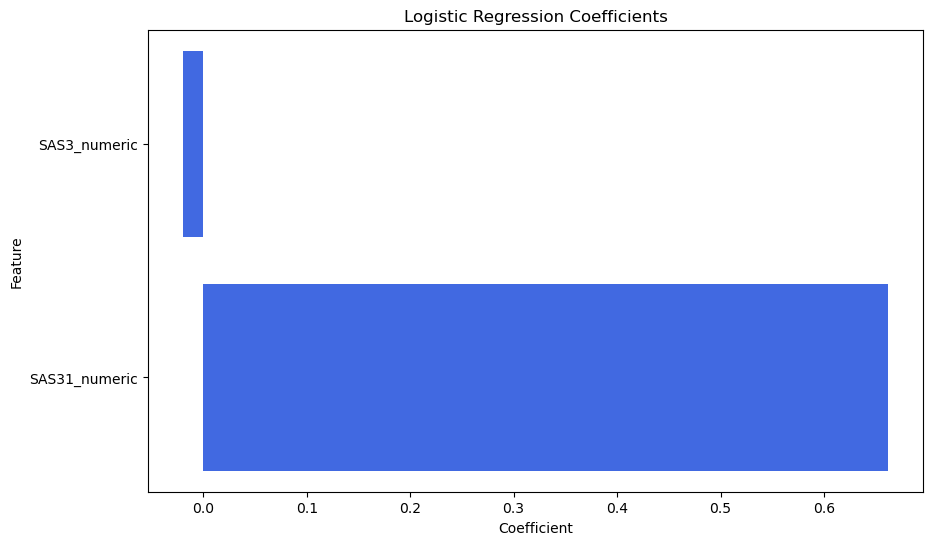

In [255]:
df_random_forest_confidence = df_reg[['SAS3', 'SAS31', 'Good Job']].dropna()

confidence_mapping = {
    'Excellent': 'Good',
    'Good': 'Good',
    'Fair': 'Poor',
    'Poor': 'Poor',
    'Very poor': 'Poor'
}

# Create the new column 'Good Job Binary'
df_random_forest_confidence['Good Job Binary'] = df_random_forest_confidence['Good Job'].map(confidence_mapping)

# Map ordinal categories to numeric values
sas3_mapping = {
    'Strongly disagree': 1,
    'Tend to disagree': 2,
    'Neither agree nor disagree': 3,
    'Tend to agree': 4,
    'Strongly agree': 5
}

sas31_mapping = {
    'Not at all confident': 1,
    'Not very confident': 2,
    'Fairly confident': 3,
    'Very confident': 4
}

df_random_forest_confidence['SAS3_numeric'] = df_random_forest_confidence['SAS3'].map(sas3_mapping)
df_random_forest_confidence['SAS31_numeric'] = df_random_forest_confidence['SAS31'].map(sas31_mapping)

# Define predictors and target
predictors_confidence = ['SAS3_numeric', 'SAS31_numeric']
target_confidence = 'Good Job Binary'

# Convert target to binary values
df_random_forest_confidence['Good Job Binary'] = df_random_forest_confidence['Good Job Binary'].map({'Good': 1, 'Poor': 0})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_random_forest_confidence[predictors_confidence], df_random_forest_confidence[target_confidence], test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logistic_model_confidence = LogisticRegression()

# Train the model
logistic_model_confidence.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model_confidence.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Get the model coefficients
coefficients = logistic_model_confidence.coef_[0]
intercept = logistic_model_confidence.intercept_

# Create a DataFrame for better visualization
coefficients_df = pd.DataFrame({
    'Feature': predictors_confidence,
    'Coefficient': coefficients
})

# Print coefficients
print("\nLogistic Regression Coefficients:")
print(coefficients_df)
print(f"\nIntercept: {intercept[0]}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'], color='royalblue')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.gca().invert_yaxis()
plt.show()


Confusion Matrix:
[[3780  767]
 [2974  932]]

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.83      0.67      4547
           1       0.55      0.24      0.33      3906

    accuracy                           0.56      8453
   macro avg       0.55      0.53      0.50      8453
weighted avg       0.55      0.56      0.51      8453


Accuracy Score:
0.557435230095824

Logistic Regression Coefficients:
         Feature  Coefficient
0   SAS3_numeric     0.000081
1  SAS31_numeric     0.374862

Intercept: -1.244338991790297


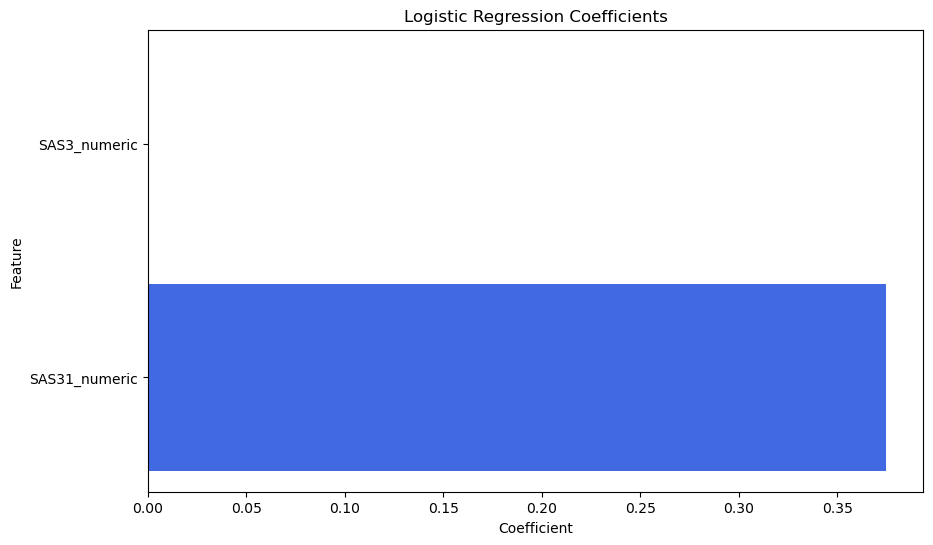

In [258]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt

# Assuming df_reg is your DataFrame
df_random_forest_informed = df_reg[['SAS3', 'SAS31', 'Well informed']].dropna()

informed_mapping = {
    'Very well informed': 'Informed',
    'Fairly well informed': 'Informed',
    'Not at all informed': 'Not informed'
}

# Create the new column 'Well informed Binary'
df_random_forest_informed['Well informed Binary'] = df_random_forest_informed['Well informed'].map(informed_mapping)

# Map ordinal categories to numeric values
sas3_mapping = {
    'Strongly disagree': 1,
    'Tend to disagree': 2,
    'Neither agree nor disagree': 3,
    'Tend to agree': 4,
    'Strongly agree': 5
}

sas31_mapping = {
    'Not at all confident': 1,
    'Not very confident': 2,
    'Fairly confident': 3,
    'Very confident': 4
}

df_random_forest_informed['SAS3_numeric'] = df_random_forest_informed['SAS3'].map(sas3_mapping)
df_random_forest_informed['SAS31_numeric'] = df_random_forest_informed['SAS31'].map(sas31_mapping)

# Define predictors and target
predictors_informed = ['SAS3_numeric', 'SAS31_numeric']
target_informed = 'Well informed Binary'

# Convert target to binary values
df_random_forest_informed['Well informed Binary'] = df_random_forest_informed['Well informed Binary'].map({'Informed': 1, 'Not informed': 0})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_random_forest_informed[predictors_informed], df_random_forest_informed[target_informed], test_size=0.4, random_state=42)

# Initialize the Logistic Regression model
logistic_model_informed = LogisticRegression()

# Train the model
logistic_model_informed.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model_informed.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Get the model coefficients
coefficients = logistic_model_informed.coef_[0]
intercept = logistic_model_informed.intercept_

# Create a DataFrame for better visualization
coefficients_df = pd.DataFrame({
    'Feature': predictors_informed,
    'Coefficient': coefficients
})

# Print coefficients
print("\nLogistic Regression Coefficients:")
print(coefficients_df)
print(f"\nIntercept: {intercept[0]}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'], color='royalblue')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.gca().invert_yaxis()
plt.show()
